# Exploración de indicadores que reflejen la incidencia de Covid-19 en Venezuela usando fuentes de datos no oficiales.

# Análisis de datos extraídos de Twitter

Este notebook de Jupyter contiene todo el código utilizado para el análisis y la construcción de las series de tiempo de los datos extraídos de Twitter.
___ 

## Configuración

Configurar el entorno importando las bibliotecas con las que se trabajaran. `pandas`, una biblioteca de ciencia de datos; `matplotlib` y `seaborn` bibliotecas para la visualización de los datos. 


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

Definir el estilo de las gráficas utilizando `seaborn`.

In [3]:
#tamaño
sns.set(rc={'figure.figsize':(11, 5)})
#fondo
sns.set_style("white") 

## Clasificación de los datos

La consulta está comprendida entre marzo de 2020 hasta el 10 de mayo de 2021, ésta coincide con las palabras claves "covid-19", "coronavirus", "infectado covid-19", "muerte covid-19", "bombona de oxígeno", "flujómetro de oxígeno", "saturación de oxígeno, "dexametasona", "GoFundMe venezuela covid-19", "recolectar dinero", "ayuda covid-19", "tratamiento covid-19", "UCI covid-19", y "servicio público covid-19". Puede ver el notebook de extracción de datos [aquí](https://github.com/bonaldee/Proyecto_OP2/blob/main/codigo/Twitter_Datos.ipynb).

Sin embargo, "covid-19" y "coronavirus" se descartan debido a que estos tweets están relacionados a cualquier noticia o comentarios sobre el  COVID_19 desde el inicio de la pandemia, no necesariamente sobre infectados. El resto de consultas las dividimos en 6 grupos, a saber: 

1. Grupo 1 
   - infectado covid-19
   - muerte covid-19
2. Grupo 2 
   - bombona de oxígeno
   - flujometro de oxígeno
   - saturación de oxígeno
   - dexametasona
3. Grupo 3
   - GoFundMe venezuela covid-19
   - recolectar dinero covid-19
   - ayuda covid-19
4. Grupo 4
   - servicio público
5. Grupo 5
   - UCI
   - unidad de cuidados intensivos.
6. Grupo 6
   - tratamiento covid-19

___

### Presentación de los datos totales

Primero se muestra la relación de los tweets totales extraídos desde marzo 2020 hasta mayo 2021, los cuales fueron 3307, luego se hace la presentación individual por grupo. 

En principio, se cargan los datos que se encuentran de un archivo .CSV.; luego se pide su forma para estar al tanto de cuantos tweets se recaudaron en total; finalmente se eliminan las filas que sean iguales ya que representan tweets repetidos.

In [4]:
df = pd.read_csv('../datos/datos_twitter/data.csv', parse_dates=['created_at'])
print(df.shape)
df.drop_duplicates(keep='first')

(3307, 2)


,created_at,text
0,2021-04-28 11:18:54+00:00,Sumado al dolor por la muerte de Aristóbulo Is...
1,2021-04-27 13:53:51+00:00,Muy triste por la muerte del profesor Andrés S...
2,2021-04-24 17:18:23+00:00,@eloscarale *disminuye las probabilidades de c...
3,2021-04-24 14:23:13+00:00,"Éste capítulo se llama ""Danzando alrededor de ..."
4,2021-04-20 00:15:53+00:00,"Lamento la muerte del Alcalde Bastidas, como ..."
...,...,...
3302,2021-03-17 23:16:05+00:00,@pulte hola señor pulten son tantas las veces...
3303,2021-03-17 20:43:27+00:00,Help save my mom Mildred´s eyesight https://t....
3304,2021-03-16 19:44:22+00:00,Seguimos en la busqueda de medicamentos y ayud...
3305,2021-03-16 12:25:27+00:00,No crean NUNCA en opositores de mierda cuando ...


De los 3307 tweets recaudados en total, luego de eliminar las columnas repetidas, queda un total de 3143. 

A continuación, se crea una función que hace la conversión de la columna "created_ad" a un formato específico para ser utilizado en las series de tiempo, luego agrupa las entradas de cada día y la convierte en una serie de tiempo.

In [5]:
def counts_time_series(df):
    """Convertir la columna 'created_at' a fecha"""
    df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d', errors='coerce')
    
    """Agrupa por el día y cuenta el numero de entradas con ese día"""
    time_series_with_counts = df.groupby(df['created_at'].dt.floor('d')).size()
    
    return time_series_with_counts

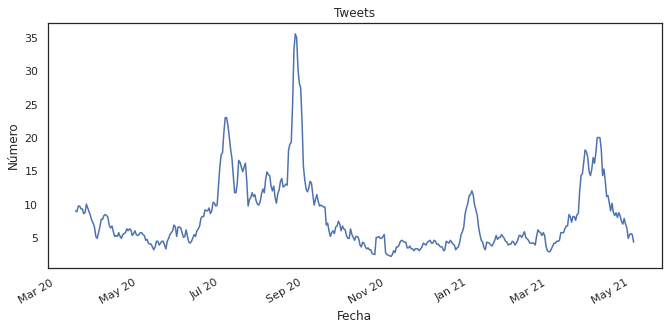

In [11]:
twitter_time_series =  counts_time_series(df).rolling(window=7, center=True).mean()
ax = twitter_time_series.plot(title="Tweets", xlabel = "Fecha", ylabel = "Número")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.show()

In [13]:
# Exportamos
twitter_time_series.to_csv('../datos/series_Twitter.csv') #escribimos el df

# Análisis de la serie de tiempo

En la figura se observa un comportamiento irregular a lo largo de la pandemia, sin embargo, se puede notar que en septiembre de 2020 existe un número de publicaciones considerablemante más alto que en otras fechas, lo cual implica una pendiente creciente significativa en la serie de tiempo. También tenemos un incremento notable en agosto de 2020 y abril de 2021. 

### Grupo 1: infectado covid-19, muerte covid-19

In [ ]:
df = pd.read_csv('../datos/datos_twitter/twitter_1_grupo.csv', parse_dates=['created_at']) #leer los datos, con la columna 'created at' como fecha 
print(df.shape)
df.drop_duplicates(keep='first')

En total se extraen 365 tweets, luego de remover los tweets duplicados, queda un total de 360, los cuales se distribuyen de la siguiente manera: 

In [ ]:
twitter_time_series =  counts_time_series(df)
twitter_time_series.plot(title="Tweets", xlabel = "Fecha", ylabel = "Número")

### Grupo 2: bombona de oxígeno, flujometro de oxígeno, saturación de oxígeno, dexametasona

In [ ]:
df = pd.read_csv('../datos/datos_twitter/twitter_2_grupo.csv', parse_dates=['created_at']) #leer los datos, con la columna 'created at' como fecha 
print(df.shape)
df.drop_duplicates(keep='first')

En total se extraen 295 tweets, luego de remover los tweets duplicados, queda un total de 247, los cuales se distribuyen de la siguiente manera: 

In [ ]:
twitter_time_series =  counts_time_series(df)
twitter_time_series.plot(title="Tweets", xlabel = "Fecha", ylabel = "Número")

### Grupo 3: GoFundMe venezuela covid-19, recolectar dinero covid-19, ayuda covid-19

In [ ]:
df = pd.read_csv('../datos/datos_twitter/twitter_3_grupo.csv', parse_dates=['created_at']) #leer los datos, con la columna 'created at' como fecha 
print(df.shape)
df.drop_duplicates(keep='first')

En total se extraen 757 tweets, luego de remover los tweets duplicados, queda un total de 745, los cuales se distribuyen de la siguiente manera: 

In [ ]:
twitter_time_series =  counts_time_series(df)
twitter_time_series.plot(title="Tweets", xlabel = "Fecha", ylabel = "Número")

### Grupo 4: servicio público

In [ ]:
df = pd.read_csv('../datos/datos_twitter/twitter_4_grupo.csv', parse_dates=['created_at']) 
print(df.shape)
df.drop_duplicates(keep='first')

En total se extraen 1490 tweets, luego de remover los tweets duplicados, queda un total de 1430, los cuales se distribuyen de la siguiente manera:

In [ ]:
twitter_time_series =  counts_time_series(df)
twitter_time_series.plot(title="Tweets", xlabel = "Fecha", ylabel = "Número")

### Grupo 5: UCIS, unidad de cuidados intensivos

In [ ]:
df = pd.read_csv('../datos/datos_twitter/twitter_5_grupo.csv', parse_dates=['created_at'])  
print(df.shape) 
df.drop_duplicates(keep='first')

En total se extraen 76 tweets, luego de remover los tweets duplicados, queda un total de 76, los cuales se distribuyen de la siguiente manera:

In [ ]:
twitter_time_series =  counts_time_series(df)
twitter_time_series.plot(title="Tweets", xlabel = "Fecha", ylabel = "Número")

### Grupo 6: tratamiento covid-19 

In [ ]:
df = pd.read_csv('../datos/datos_twitter/twitter_6_grupo.csv', parse_dates=['created_at']) 
print(df.shape)
df.drop_duplicates(keep='first')

En total se extraen 76 tweets, luego de remover los tweets duplicados, queda un total de 76, los cuales se distribuyen de la siguiente manera:

In [ ]:
twitter_time_series =  counts_time_series(df)
twitter_time_series.plot(title="Tweets", xlabel = "Fecha", ylabel = "Número")